Saving ima1.jpeg to ima1.jpeg


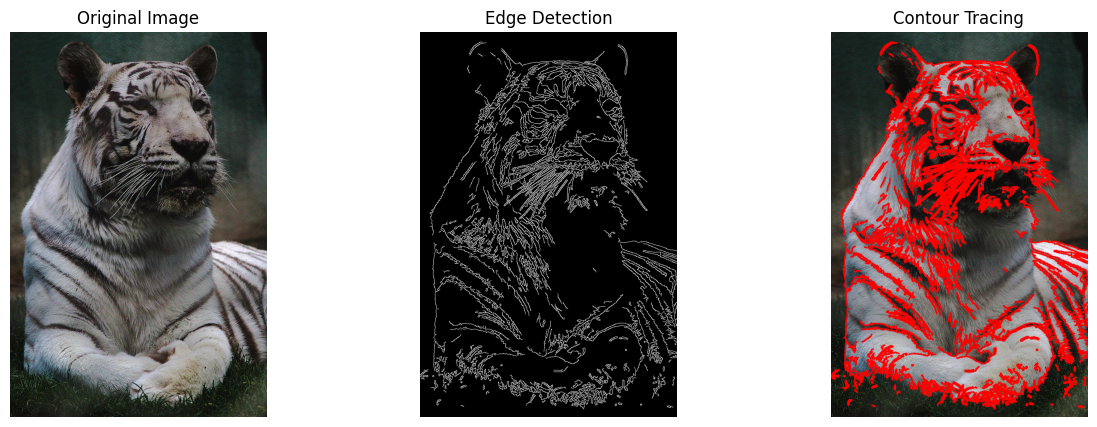

Number of contours detected: 721


In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload image from your system
uploaded = files.upload()

# Get uploaded filename
image_path = list(uploaded.keys())[0]

# Read image
image = cv2.imread(image_path)

if image is None:
    print("Error: Image not loaded properly.")
    exit()

# Convert to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur
blur = cv2.GaussianBlur(gray, (5,5), 0)

# Canny Edge Detection
edges = cv2.Canny(blur, 50, 150)

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours
contour_image = image_rgb.copy()
cv2.drawContours(contour_image, contours, -1, (255,0,0), 2)

# Show output
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(edges, cmap='gray')
plt.title("Edge Detection")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(contour_image)
plt.title("Contour Tracing")
plt.axis("off")

plt.show()

print("Number of contours detected:", len(contours))